# Data QC, first part: re-structure of .las files

In [ ]:
import pandas
from IPython.display import display, HTML
from IPython.display import Image
import numpy as np
import missingno as msno

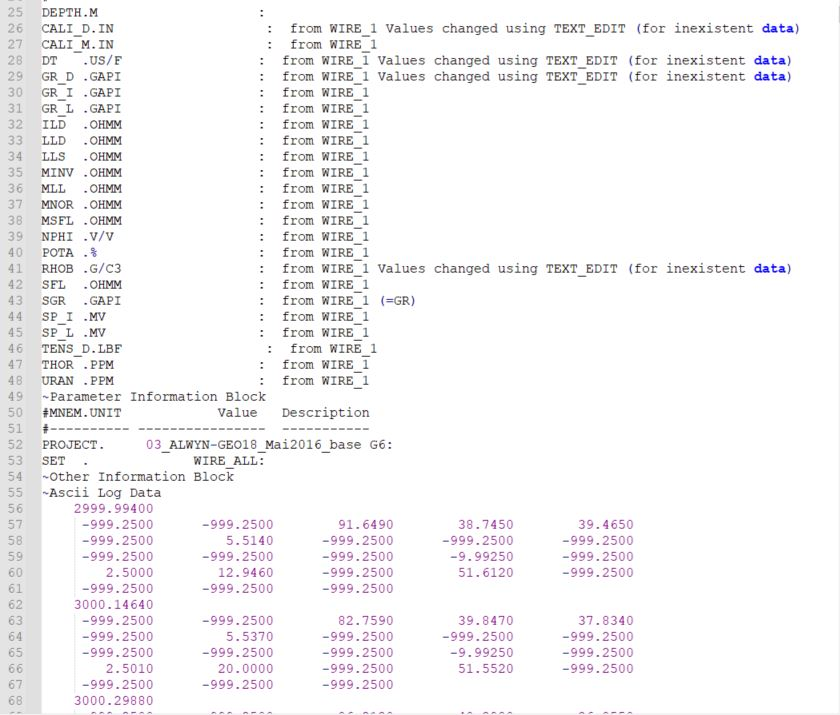

In [2]:
Image("C:/Users/Admin/Documents/Machine_learning_ifp/wells/notebooks/test_pozo.JPG")

### The number of columns does not match the number of logs contained in the file. They are overlapped. Now, to fix it:

#### 1. Reading the .las file, without consideration of the header

In [3]:
fp = "C:/Users/Admin/Documents/Machine_learning_ifp/wells/team_alwyn/DATASET_full/Dataset_Alwyn_MiniProjets/3_9a-2_wire_all.las"

with open(fp, 'r') as f:
    well = f.readlines()

well = well[55:]

#### 2. creating a list per every depth point, considerng the different logs. Then, splitting the list in order to have the correct number of colums. This is an iterative process.



In [4]:
observations = []
for i in range(0, len(well), 6):
    temp = []
    for j in range(6):
        if j == 0:
            temp.append(float(well[i]))
        else:
            temp.extend([float(val) for val in well[i + j].split()])
    observations.append(temp)

####  3. Saving these lists as a data frame and adding the corresponding name of every colums, according to the original file

In [5]:
df = pandas.DataFrame(observations)

l = ['DEPTH','CALI_D','CALI_M','DT','GR_D', 'GR_I','GR_L', 'ILD','LLD','LLS','MINV','MLL','MNOR','MSFL','NPHI','POTA','RHOB','SFL','SGR','SP_I','SP_L','TENS_D','THOR','URAN']
n = dict(zip(range(len(l)), l))

df_final = df.rename(n, axis=1)

df_final_show= df_final.head(10)

display(HTML(df_final_show.to_html()))


,DEPTH,CALI_D,CALI_M,DT,GR_D,GR_I,GR_L,ILD,LLD,LLS,MINV,MLL,MNOR,MSFL,NPHI,POTA,RHOB,SFL,SGR,SP_I,SP_L,TENS_D,THOR,URAN
0,2999.9940,-999.25,-999.25,91.649,38.745,39.465,-999.25,5.514,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.500,12.946,-999.25,51.612,-999.25,-999.25,-999.25,-999.25
1,3000.1464,-999.25,-999.25,82.759,39.847,37.834,-999.25,5.537,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.501,20.000,-999.25,51.552,-999.25,-999.25,-999.25,-999.25
2,3000.2988,-999.25,-999.25,86.213,40.398,36.855,-999.25,5.534,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.489,20.000,-999.25,51.262,-999.25,-999.25,-999.25,-999.25
3,3000.4512,-999.25,-999.25,84.139,39.594,35.691,-999.25,5.518,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.505,20.000,-999.25,51.262,-999.25,-999.25,-999.25,-999.25
4,3000.6036,-999.25,-999.25,89.080,38.897,35.538,-999.25,5.502,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.513,20.000,-999.25,51.664,-999.25,-999.25,-999.25,-999.25
5,3000.7560,-999.25,-999.25,89.324,38.553,35.946,-999.25,5.486,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.499,20.000,-999.25,52.124,-999.25,-999.25,-999.25,-999.25
6,3000.9084,-999.25,-999.25,88.878,38.189,36.368,-999.25,5.470,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.486,20.000,-999.25,52.459,-999.25,-999.25,-999.25,-999.25
7,3001.0608,-999.25,-999.25,86.684,37.534,36.790,-999.25,5.454,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.505,20.000,-999.25,52.766,-999.25,-999.25,-999.25,-999.25
8,3001.2132,-999.25,-999.25,88.709,35.698,37.107,-999.25,5.438,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.521,20.000,-999.25,52.975,-999.25,-999.25,-999.25,-999.25
9,3001.3656,-999.25,-999.25,85.527,33.022,36.959,-999.25,5.422,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-9.9925,-999.25,2.490,20.000,-999.25,52.888,-999.25,-999.25,-999.25,-999.25


### Prior to conducting additional data analysis or machine learning, it is critical to identify and handle missing data. In this case, we have -999.25 as "not a number" value. 

#### 4. We are working in Python: we need to read those values as "NaN". If the missing data in your dataframe is represented by something other than NaN, we can do the following.

In [38]:
df_save = df_final.replace(-999.25, np.NaN)
#display(HTML(df_save.to_html())) , if you want to display the data frame and confirm the change of the NaN

#### 5. Once the missing values are now NaN type, we can work properly with the data. A visualization of the statistics of the data frame is recommended

In [35]:
df_save.describe()

,DEPTH,CALI_D,CALI_M,DT,GR_D,GR_I,GR_L,ILD,LLD,LLS,...,NPHI,POTA,RHOB,SFL,SGR,SP_I,SP_L,TENS_D,THOR,URAN
count,6004.000000,2297.000000,2297.000000,6004.000000,5778.000000,6004.000000,2291.000000,6004.000000,2297.000000,2297.000000,...,6004.000000,2297.000000,6004.000000,6004.000000,2293.000000,6004.000000,2297.00000,2297.000000,2297.000000,2297.000000
mean,3457.422300,9.754584,9.893040,84.143494,74.691151,67.498635,77.455551,7.116857,20.333988,8.712920,...,-6.074376,2.435803,2.435459,9.481280,74.732252,64.410952,80.63885,7717.730772,5.933271,1.897731
std,264.162342,1.482439,1.766285,10.856137,32.968277,26.034678,30.239909,6.841553,77.041639,16.818884,...,4.978360,0.886555,0.165004,5.787746,30.640902,4.474778,4.57327,454.789017,3.491880,1.623510
min,2999.994000,8.517000,7.764000,62.619000,0.295000,18.740000,21.546000,1.514000,1.352000,1.389000,...,-9.992500,0.315000,1.438000,0.182000,20.856000,48.961000,71.88000,4622.819800,-0.686000,-0.481000
25%,3228.708150,8.681000,8.500000,76.687000,47.239250,45.532250,53.374500,3.836750,4.148000,3.838000,...,-9.992500,1.964000,2.357000,9.259500,49.850000,61.649750,77.26900,7522.717800,2.954000,1.049000
50%,3457.422300,9.163000,9.410000,82.158500,72.531000,65.260000,74.768000,5.899000,5.929000,5.576000,...,-9.992500,2.435000,2.454000,10.075000,71.307000,63.731000,79.69500,7711.354000,5.628000,1.589000
75%,3686.136450,9.991000,10.373000,90.362000,96.324000,86.137500,96.841000,7.711000,11.684000,9.889000,...,0.185087,2.985000,2.558000,10.075000,91.860000,66.936750,83.38600,7998.340800,8.534000,2.238000
max,3914.850600,15.373000,16.999000,139.360000,297.355000,196.661000,195.842000,138.310000,2358.471900,439.094000,...,0.641370,10.219000,2.913000,65.434000,199.716000,76.378000,92.09800,9994.470700,17.502000,24.299000


In [43]:
# if we want to see how many non-null values we have:

df_save.info()

#we can notice that we don't have null values. Remember: Null values represent "nothing" or "no value," and are not the same as an empty string or zero. 
#Null values can be used to denote the absence of anything valuable. "Not a Number" , on the other hand,is the abbreviation for NaN. 
#they are not the same, but we will threaten equally for this purpose.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6004 entries, 0 to 6003
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   6004 non-null   float64
 1   CALI_D  2297 non-null   float64
 2   CALI_M  2297 non-null   float64
 3   DT      6004 non-null   float64
 4   GR_D    5778 non-null   float64
 5   GR_I    6004 non-null   float64
 6   GR_L    2291 non-null   float64
 7   ILD     6004 non-null   float64
 8   LLD     2297 non-null   float64
 9   LLS     2297 non-null   float64
 10  MINV    2297 non-null   float64
 11  MLL     2297 non-null   float64
 12  MNOR    2297 non-null   float64
 13  MSFL    2297 non-null   float64
 14  NPHI    6004 non-null   float64
 15  POTA    2297 non-null   float64
 16  RHOB    6004 non-null   float64
 17  SFL     6004 non-null   float64
 18  SGR     2293 non-null   float64
 19  SP_I    6004 non-null   float64
 20  SP_L    2297 non-null   float64
 21  TENS_D  2297 non-null   float64
 22  

#### 5. We can also visualize the missing values with the missingno library. 

#### This is just an example. You should visualize and QC all your data as a prerequisite for any ML computation.

<AxesSubplot:>

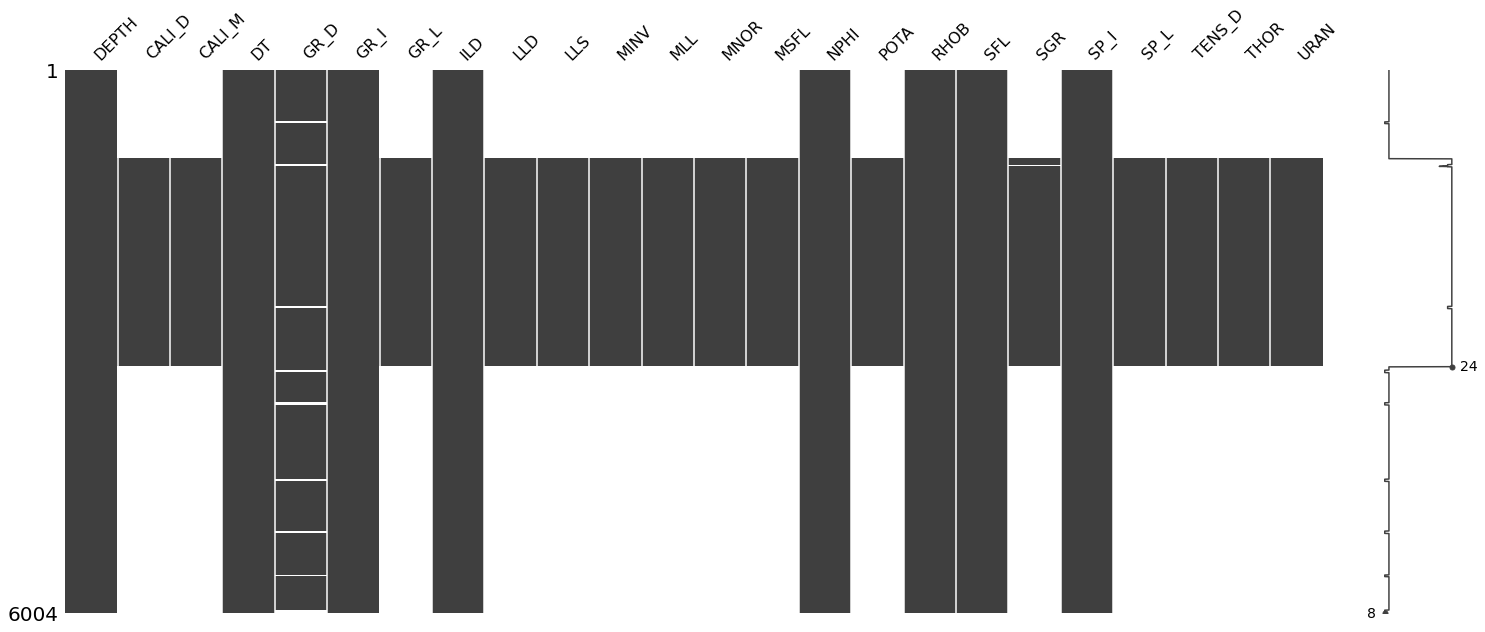

In [44]:
msno.matrix(df_save) 
#we try with a matrix plot visualization, but you are invited to test the different visualizations available withint this library.
#here we can see that all the logs have no missing values (remember NaN and null are different), so we see the full columns in gray.
#Usually, this plot helps to understand how the missing values are distributed in the samples and it is especially useful for handling the well data.

#### 6. saving the data frame to csv (to handle the data more easily in subsequent processes)

In [42]:
df_save.to_csv ('C:/Users/Admin/Documents/Machine_learning_ifp/wells/team_alwyn/DATASET_full/3_9A-2_corrected.csv', index = False, header=True)

## Authors: Maria Betania Cedeño Tepedino.
## Peer review: Imoleayo Fashagba